# Decelerating defects and non-ergodic behaviour

In [4]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

We consider an infinite chain of maps $X_{n+1}^k = f(X_n^k)e^{-\gamma X_{n}^{k-1}}$.

In [9]:
def f(x,r):
    return r*x*(1-x)

def forward(X,r,gamma):
    Y = np.zeros(len(X))
    for k in range(len(X)):
        Y[k] = f(X[k],r)*np.exp(-gamma*X[k-1])
    return Y

def forwardlog(X,r,gamma):
    Y = np.zeros(size)
    for k in range(len(X)):
        Y[k] = np.log(r)+X[k]+np.log(1.0-np.exp(X[k]))-gamma*np.exp(X[k-1])
    return Y

def plotX(X,n):
    pl.scatter(range(len(X)),n*np.ones(len(X)),c=X,s=100)
    pl.show()
    return None

def plotXX(XX):
    for n in range(len(XX)):
        pl.scatter(range(len(XX[0])),n*np.ones(len(XX[0])),c=XX[n],s=50,edgecolors='none')
    pl.show()
    return None

def plottimeseries(XX,size):
    for k in range(size):
        pl.plot(list(zip(*XX))[k])
    pl.show()
    return None

def plottimeserieslog(XX,size):
    for k in range(size):
        pl.plot(np.log(list(zip(*XX))[k]))
    pl.show()
    return None

With $k\in \{ 0,1,2 \}$ we have the original "cycling chaos". For $\gamma = 0.0$ each node enjoys chaotic dynamics.

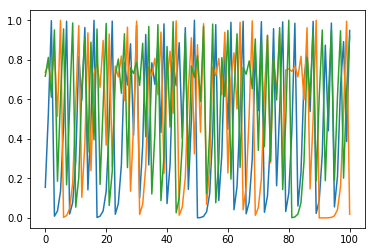

In [10]:
size = 3
X = np.random.rand(size)
r = 4.0
gamma = 0.0
XX = [X]
for n in range(100):
    X = forward(X,r,gamma)
    XX.append(X)
plottimeseries(XX,size)

For larger $\gamma$, a periodic orbit appears.

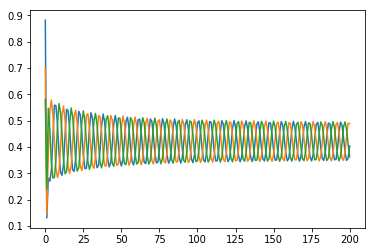

In [11]:
size = 3
X = np.random.rand(size)
r = 4.0
gamma = 2.0
XX = [X]
for n in range(200):
    X = forward(X,r,gamma)
    XX.append(X)
plottimeseries(XX,size)

When $\gamma$ nearly reaches a critical value, we see irregular cycling with erratic switching between subspaces.

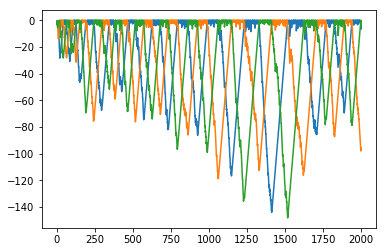

In [12]:
size = 3
X = np.random.rand(size)
r = 4.0
gamma = 3.9*np.log(r)
XX = [X]
for n in range(2000):
    X = forward(X,r,gamma)
    XX.append(X)
plottimeserieslog(XX,size)

For $\gamma > \gamma_c$, cycling chaos appears. ($\gamma_c$ is computable and depends on the longterm average for the natural measure of the logistic map). This is an example of non-ergodic behaviour --- longterm averages at each cell will not converge (so, for example, Lyapunov exponents do not exist). 

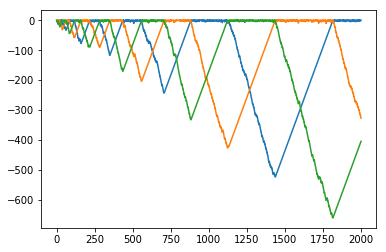

In [13]:
size = 3
X = np.random.rand(size)
r = 4.0
gamma = 6.0
XX = [X]
for n in range(2000):
    X = forward(X,r,gamma)
    XX.append(X)
plottimeserieslog(XX,size)

Now we increase the number of cells, keeping the one-way inhibitory coupling. With zero coupling each cell oscillates independently, producing spatio-temporal chaos. 

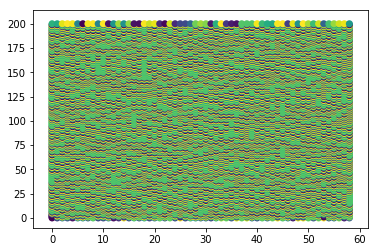

In [14]:
size = 59
X = np.random.rand(size)
r = 3.8
gamma = 0.0
XX = [X]
for n in range(200):
    X = forward(X,r,gamma)
    XX.append(X)
plotXX(XX)

Increasing $\gamma$ we turn on the inhibitory coupling, and the systems settles down into spatial period-2 dynamics in which cells are alternately actively and suppressed.

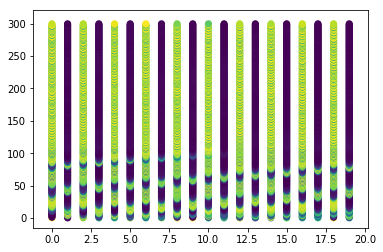

In [15]:
size = 20
X = np.random.rand(size)
r = 3.8
gamma = 2.0
XX = [X]
for n in range(300):
    X = forward(X,r,gamma)
    XX.append(X)
plotXX(XX)

If we have an odd number of cells, spatial period-2 dynamics are impossible. There is a defect in the pattern (an extra suppressed cell). If the coupling $\gamma > \gamma_c$ then this defect will slow down as it travels round the cells.

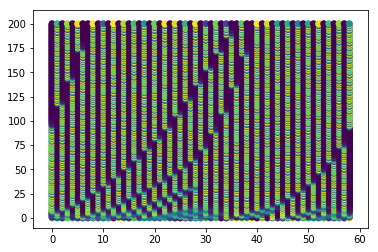

In [16]:
size = 59
X = np.random.rand(size)
r = 3.8
gamma = 2.5
XX = [X]
for n in range(200):
    X = forward(X,r,gamma)
    XX.append(X)
plotXX(XX)

Note that there may be more than one defect in the pattern at some early stage. However, the (decelerating) speed at which they travel will typically be different (depending on the value of $X$ at the cell). When a faster defect catches up with a slower defect, they annihilate in pairs, leaving a single defect, which destroys the ergodicity of the system.

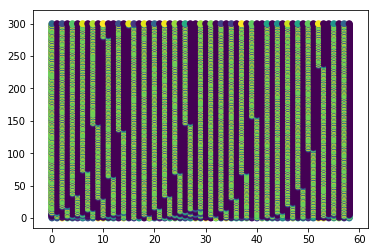

In [17]:
size = 59
X = np.random.rand(size)
r = 3.8
gamma = 4.5
XX = [X]
for n in range(300):
    X = forward(X,r,gamma)
    XX.append(X)
plotXX(XX)

# Defects on networks

In [18]:
import networkx as nx

Define oscillatory dynamics on a directed graph, in which a directed edge implies inhibitory coupling in the same manner as above. A simple example is formed from a pair of triangular graphs connected by a directed edge. The nodes in the isolated half can display cycling chaos, while the others will be suppressed. 

2
<generator object strongly_connected_components at 0x000001EB5A359C00>
[[0, 1, 2], [3, 4, 5]]


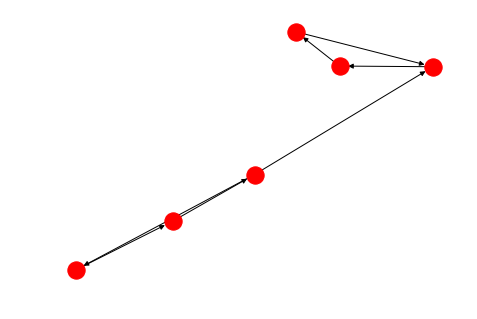

In [20]:
G = nx.DiGraph()
G.add_edges_from([(0,1),(1,2),(2,0),(2,3),(3,4),(4,5),(5,3)])
size = len(G.nodes())
nx.draw(G)
print(nx.number_strongly_connected_components(G))
print(nx.strongly_connected_components(G))
print([k for k in nx.simple_cycles(G)])

In [23]:
def graphforward(X,G,r,gamma):
    Y = np.zeros(size)
    for k in range(size):
        Y[k] = f(X[k],r)
        for edge in G.in_edges(k):
            Y[k] *= np.exp(-gamma*X[edge[0]])
    return Y

def graphtimeseries(XX,nodes):
    for k in nodes:
        pl.plot(np.log((list(zip(*XX))[k])))
    pl.show()
    return None    

def graphtimeseriesnolog(XX,nodes):
    for k in nodes:
        pl.plot((list(zip(*XX)[k])))
    pl.show()
    return None  

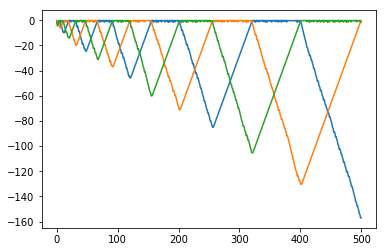

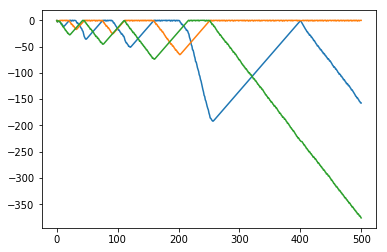

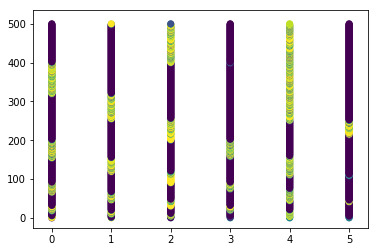

In [24]:
X = np.random.rand(size)
r = 3.8
gamma = 4.5
XX = [X]
for n in range(500):
    X = graphforward(X,G,r,gamma)
    XX.append(X)
graphtimeseries(XX,[0,1,2])
graphtimeseries(XX,[3,4,5])
plotXX(XX)

Another simple graph...

1
<generator object strongly_connected_components at 0x000001EB5B0A4390>
[[0, 1, 2], [2, 3, 4]]


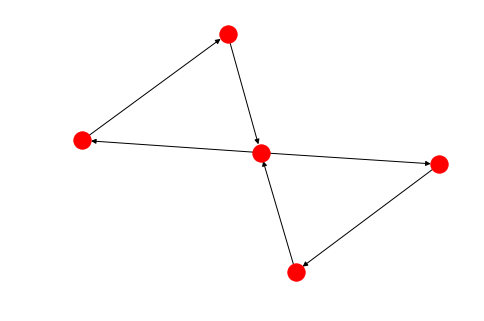

In [26]:
G = nx.DiGraph()
G.add_edges_from([(0,1),(1,2),(2,0),(2,3),(3,4),(4,2)])
size = len(G.nodes())
nx.draw(G)
print(nx.number_strongly_connected_components(G))
print(nx.strongly_connected_components(G))
print([k for k in nx.simple_cycles(G)])

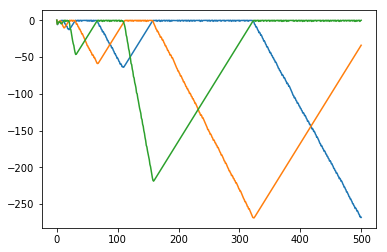

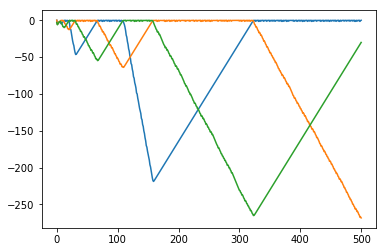

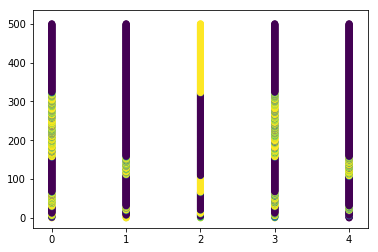

In [27]:
X = np.random.rand(size)
r = 3.8
gamma = 4.5
XX = [X]
for n in range(500):
    X = graphforward(X,G,r,gamma)
    XX.append(X)
graphtimeseries(XX,[0,1,2])
graphtimeseries(XX,[2,3,4])
plotXX(XX)

What about a random graph? This is, of course, hugely more complicated, but we may still have elements of invariant subspaces. 

16
<generator object strongly_connected_components at 0x000001EB5A28AC00>
[[6, 9, 14], [6, 18, 14], [6, 18, 13], [6, 18, 13, 9, 14], [18, 13]]


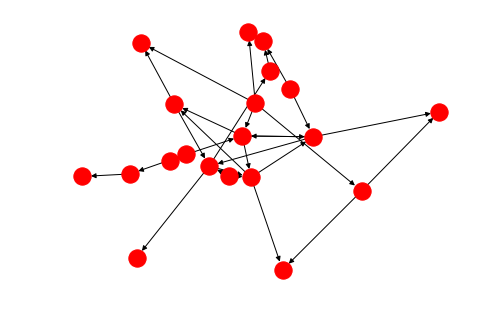

In [28]:
G = nx.gnm_random_graph(20,30,directed=True)
size = len(G.nodes())
nx.draw(G)
print(nx.number_strongly_connected_components(G))
print(nx.strongly_connected_components(G))
print([k for k in nx.simple_cycles(G)])

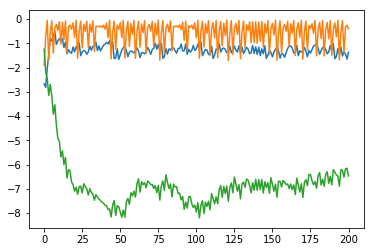

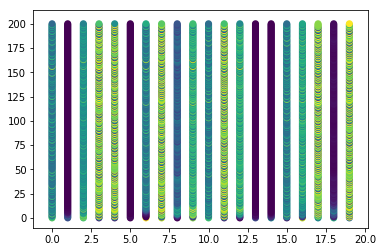

In [29]:
X = np.random.rand(size)
r = 3.8
gamma = 1.25
XX = [X]
for n in range(200):
    X = graphforward(X,G,r,gamma)
    XX.append(X)
graphtimeseries(XX,[8,11,13])
plotXX(XX)

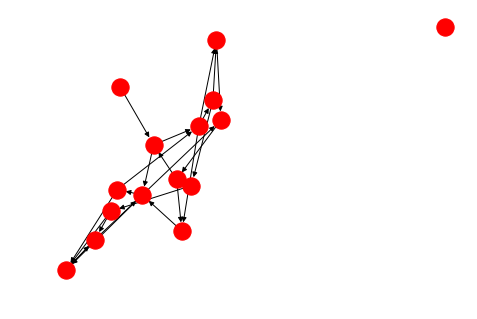

In [31]:
G = nx.gnm_random_graph(15,25,directed=True)
size = len(G.nodes())
nx.draw(G)
#pl.show()
#print nx.number_strongly_connected_components(H)
#print nx.strongly_connected_components(H)
#print [k for k in nx.simple_cycles(H)]
for cycles in nx.simple_cycles(G):
    if len(cycles)==len(G.in_edges(cycles)):
        print(cycles,G.edges(cycles))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


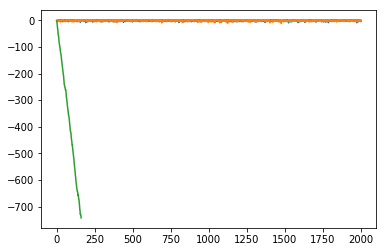

In [32]:
X = np.random.rand(size)
r = 4.0
gamma = 6.0
XX = [X]
for n in range(2000):
    X = graphforward(X,G,r,gamma)
    XX.append(X)
graphtimeseries(XX,[10,0,6])

In [38]:
def timeaverage(XX,nodes):
    for k in nodes:
        ta = [list(zip(*XX))[k][0]]
        for j in range(1,len((list(zip(*XX))[k]))):
            ta.append((j*ta[-1]+list(zip(*XX))[k][j])/(j+1))
        pl.plot(ta)
    pl.show()
    return None   

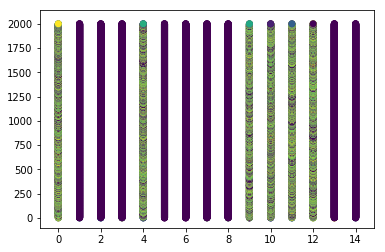

In [39]:
plotXX(XX)

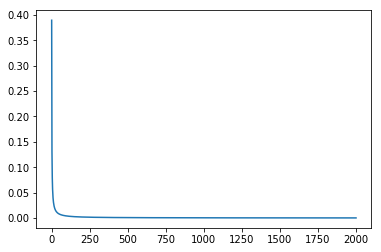

In [40]:
timeaverage(XX,[14])

[0, 6, 10]
[(10, 0), (0, 6), (6, 10)]
[(0, 2), (0, 6), (6, 10), (6, 3), (6, 14), (10, 0), (10, 9), (10, 4), (10, 8)]


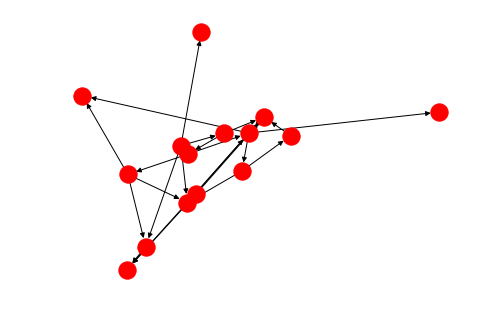

In [41]:
H = nx.DiGraph()
H.add_edges_from([(0, 2), (0, 6), (2, 14), (3, 8), (3, 9), (3, 5), (6, 10), (6, 3), (6, 14), (8, 1), (9, 1), (9, 14), (10, 0), (10, 9), (10, 4), (10, 8), (11, 9), (11, 12), (12, 2), (13, 1), (13, 2), (14, 9), (14, 11), (14, 5), (14, 7)])
nx.draw(H)
for cycles in nx.simple_cycles(H):
    if len(cycles)==len(H.in_edges(cycles)):
        print(cycles)
        print(H.in_edges(cycles))
        print(H.edges(cycles))

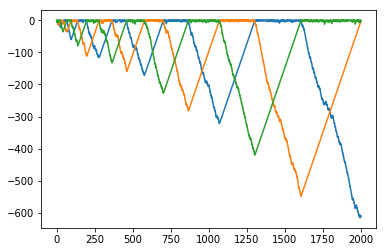

In [42]:
X = np.random.rand(size)
r = 4.0
gamma = 6.0
XX = [X]
for n in range(2000):
    X = graphforward(X,H,r,gamma)
    XX.append(X)
graphtimeseries(XX,[10,0,6])

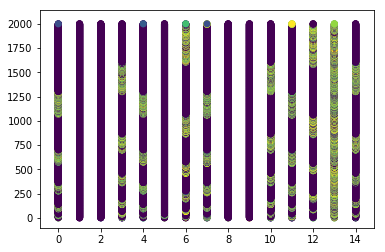

In [43]:
plotXX(XX)

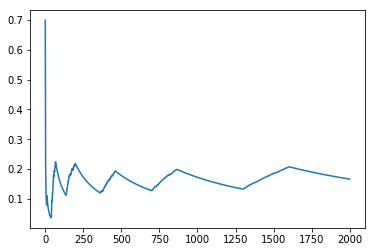

In [44]:
timeaverage(XX,[14])

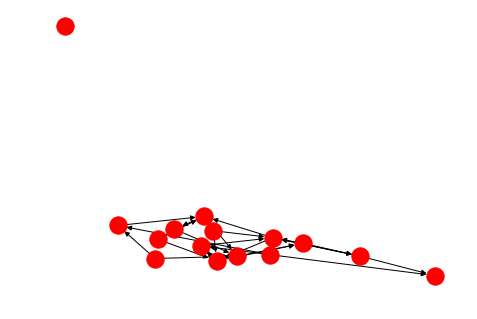

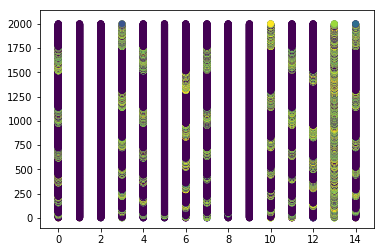

In [45]:
G = nx.gnm_random_graph(15,25,directed=True)
size = len(G.nodes())
nx.draw(G)
pl.show()
X = np.random.rand(size)
r = 4.0
gamma = 6.0
XX = [X]
for n in range(2000):
    X = graphforward(X,H,r,gamma)
    XX.append(X)
plotXX(XX)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


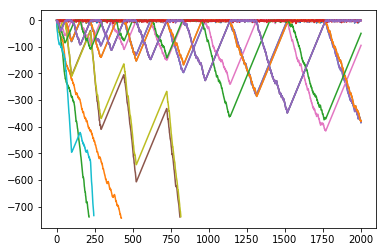

In [46]:
graphtimeseries(XX,range(15))

In [47]:
for cycles in nx.simple_cycles(G):
    if len(cycles)==len(G.in_edges(cycles)):
        print(cycles)
        print(G.in_edges(cycles))
        print(G.edges(cycles))

In [48]:
# Watts=Strogatz graphs

In [49]:
G = nx.watts_strogatz_graph(8,4,0)
size = len(G.nodes())

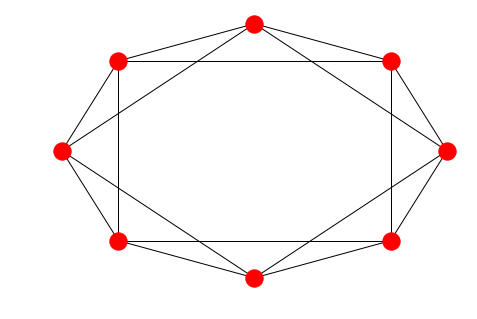

In [55]:
nx.draw_circular(G)

### How about a spatially periodic pattern on a 2d lattice?

In [38]:
# Assume a square lattice in which each cell surpresses the dynamics north, south, east and west.
# A chess board pattern should be stable. What happens if we introduce a defect?

We consider an infinite chain of maps $X_{n+1}^{i,j} = f(X_n^{i,j})e^{-\gamma \left[X_{n}^{i-1,j}+X_{n}^{i,j-1}\right]}$.

In [39]:
def forward2d(X,r,gamma):
    Y = np.zeros((size,size))
    for i in range(len(X)):
        for j in range(len(X[0])):
            Y[i][j] = f(X[i][j],r)*np.exp(-gamma*(X[i-1][j]+X[i][j-1]))
    return Y

def forwardlog2d(X,r,gamma):
    Y = np.zeros((size,size))
    for i in range(len(X)):
        for j in range(len(X[0])):
            Y[i][j] = np.log(r)+X[i][j]+np.log(1.0-np.exp(X[i][j]))-gamma*(np.exp(X[i-1][j])+np.exp(X[i][j-1]))
    return Y

In [40]:
size = 12
#X = np.random.rand(size,size)


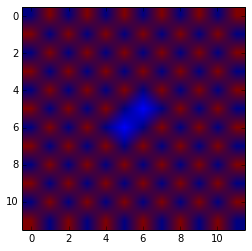

In [41]:
X = np.ones((size,size))/1000.0
X[1::2,::2] = 0.9
X[::2,1::2] = 0.9
X[5][6] = 0.002
X[6][5] = 0.002
X = np.log(X)
pl.imshow(X)

In [42]:
for k in range(50):
    X = forwardlog2d(X,4.0,6.0)

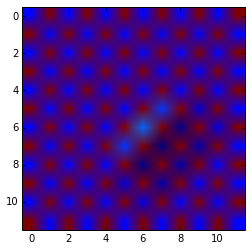

In [43]:
pl.imshow(X)

In [44]:
X

array([[ -2.10350392e+02,  -1.31944874e-01,  -2.10350392e+02,
         -1.31944874e-01,  -2.10350392e+02,  -1.31944874e-01,
         -2.10350392e+02,  -1.31944874e-01,  -2.10350392e+02,
         -1.31944874e-01,  -2.10350392e+02,  -1.31944874e-01],
       [ -1.31944874e-01,  -2.10350392e+02,  -1.31944874e-01,
         -2.10350392e+02,  -1.31944874e-01,  -2.10350392e+02,
         -1.31944874e-01,  -2.10350392e+02,  -1.31944874e-01,
         -2.10350392e+02,  -1.31944874e-01,  -2.10350392e+02],
       [ -2.10350392e+02,  -1.31944874e-01,  -2.10350392e+02,
         -1.31944874e-01,  -2.10350392e+02,  -1.31944874e-01,
         -2.10350392e+02,  -1.31944874e-01,  -2.10350392e+02,
         -1.31944874e-01,  -2.10350392e+02,  -1.31944874e-01],
       [ -1.31944874e-01,  -2.10350392e+02,  -1.31944874e-01,
         -2.10350392e+02,  -1.31944874e-01,  -2.10350392e+02,
         -1.31944874e-01,  -2.10350392e+02,  -1.31944874e-01,
         -2.10350392e+02,  -1.31944874e-01,  -2.10350392e+02],
    

In [45]:
X = np.array([1,2,3,4,5])
D = np.diag([f(xx,2.0) for xx in X])

In [46]:
A = np.array([[0,1,0,0,0],[0,0,1,0,0],[1,0,0,1,0],[0,0,0,0,1],[0,0,1,0,0]])
np.dot(A,X)

array([2, 3, 5, 5, 3])

In [47]:
v = np.exp(np.dot(A,X))

In [48]:
np.dot(D, v)

array([    0.        ,   -80.34214769, -1780.95790923, -3561.91581846,
        -803.42147693])

In [49]:
XX = np.copy(X)
X = [np.log(r)+xx + np.log(1-np.exp(xx)) for xx in X]
X = X - gamma*np.dot(A,np.exp(XX))

In [50]:
X = np.array([1,2,3])
XX = np.copy(X)
X[0] = 4
X,XX

(array([4, 2, 3]), array([1, 2, 3]))